In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as dates
from matplotlib import dates

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23')

In [10]:
#pip install jupyter_contrib_nbextensions

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_yr = dt.date(2017,8,23) - dt.timedelta(days=365)
previous_yr



datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores

data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= previous_yr).all()
data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_scores_df = pd.DataFrame(data, columns = ['date', 'precipitation'])
prcp_scores_df

prcp_scores_df.date = pd. to_datetime(prcp_scores_df.date)
prcp_scores_df.date

0      2016-08-23
1      2016-08-24
2      2016-08-25
3      2016-08-26
4      2016-08-27
          ...    
2225   2017-08-19
2226   2017-08-20
2227   2017-08-21
2228   2017-08-22
2229   2017-08-23
Name: date, Length: 2230, dtype: datetime64[ns]

In [14]:
# Sort the dataframe by date
prcp_df_sorted = prcp_scores_df.sort_values(by='date')
#Set Index
prcp_df_sorted = prcp_df_sorted.reset_index(drop=True)

prcp_df_sorted

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


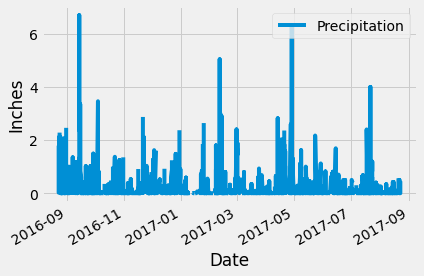

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
import pandas as pd

prcp_scores_df.plot('date', 'precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"],loc='upper right')

plt.show()



In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.name)).all()

[(9)]

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
#List the stations and the counts in descending order.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

max_temp_obs = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date >= '2016-08-23')\
    .filter(Measurement.station == 'USC00519281')\
    .all()
max_temp_obs_df = pd.DataFrame(max_temp_obs)
max_temp_obs_df.head()



,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


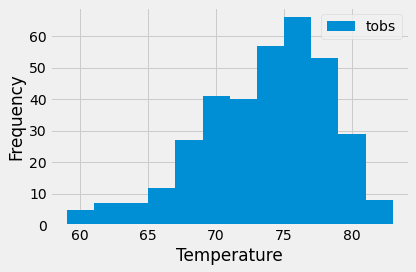

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

max_temp_obs_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()

plt.show()


# Close session

In [ ]:
# Close Session
session.close()